In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_dr =  'covid_train'
test_dr = 'covid_test'

In [3]:
train_generator = ImageDataGenerator(
    rescale= 1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2
)

In [4]:
test_generator = ImageDataGenerator(rescale=1.0/255)

In [5]:
width ,height = 512,512
batch_size = 32

In [6]:
x_train = train_generator.flow_from_directory(
    train_dr,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode= 'categorical'
)

Found 251 images belonging to 3 classes.


In [7]:
x_test = test_generator.flow_from_directory(
    test_dr,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode= 'categorical'
)

Found 66 images belonging to 3 classes.


In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(width,height,3)),
    MaxPool2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(x_train, epochs=25, batch_size=batch_size,validation_data=x_test)

Epoch 1/25


8/8 [==============================] - 52s 6s/step - loss: 1.2564 - accuracy: 0.3665 - val_loss: 1.0771 - val_accuracy: 0.4091
Epoch 2/25
8/8 [==============================] - 50s 6s/step - loss: 0.7707 - accuracy: 0.6454 - val_loss: 1.9200 - val_accuracy: 0.5606
Epoch 3/25
8/8 [==============================] - 48s 6s/step - loss: 0.7368 - accuracy: 0.7331 - val_loss: 1.0642 - val_accuracy: 0.6515
Epoch 4/25
8/8 [==============================] - 51s 7s/step - loss: 0.6776 - accuracy: 0.6932 - val_loss: 0.9777 - val_accuracy: 0.6364
Epoch 5/25
8/8 [==============================] - 42s 5s/step - loss: 0.6785 - accuracy: 0.7092 - val_loss: 1.2641 - val_accuracy: 0.5152
Epoch 6/25
8/8 [==============================] - 56s 6s/step - loss: 0.6552 - accuracy: 0.7729 - val_loss: 1.0352 - val_accuracy: 0.6212
Epoch 7/25
8/8 [==============================] - 44s 5s/step - loss: 0.5188 - accuracy: 0.7888 - val_loss: 0.9234 - val_accuracy: 0.6212
Epoch 8/25
8/8 [================

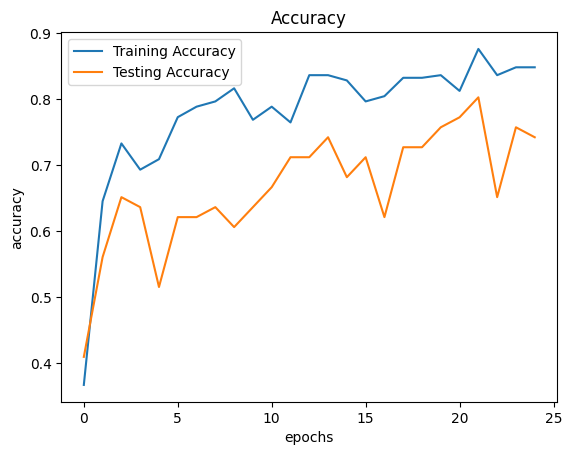

In [13]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Testing Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend()

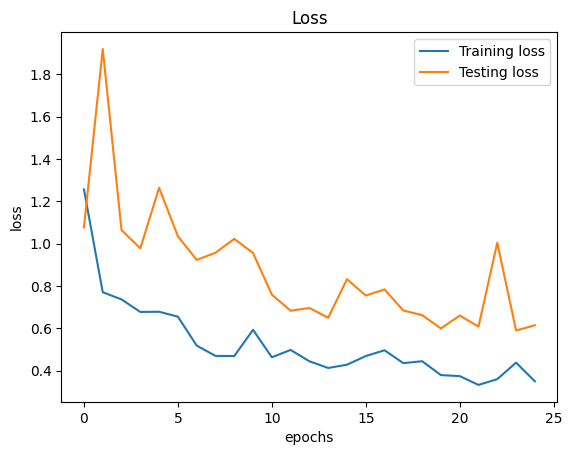

In [14]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Testing loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.legend()

In [15]:
class_names = x_test.class_indices
classes = {value:key for key, value in class_names.items()}
print('Class Names',classes)

Class Names {0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}


In [16]:
from tensorflow.keras.preprocessing import image


In [17]:
img = image.load_img('0102.jpeg', target_size=(width,height))

In [18]:
img_arr = image.img_to_array(img)

In [19]:
img_arr = np.expand_dims(img_arr,axis=0)

In [20]:
img_arr = img_arr / 255.

In [21]:
pred = model.predict(img_arr)

1/1 [==============================] - 1s 848ms/step


In [22]:
np.argmax(pred)

1

In [24]:
print('The given image is of class :', classes[np.argmax(pred)])

The given image is of class : Normal


Relularization

In [8]:
model2 = Sequential()

model2.add(Conv2D(32, (3,3), activation='relu', input_shape=(width,height,3)))
model2.add(BatchNormalization())
model2.add(MaxPool2D(2,2))

model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(2,2))

model2.add(Conv2D(128, (3,3), activation='relu', input_shape=(width,height,3)))
model2.add(BatchNormalization())
model2.add(MaxPool2D(2,2))

model2.add(Flatten())

model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(3, activation='softmax'))


In [9]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 510, 510, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 255, 255, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 253, 253, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history2 = model2.fit(x_train, epochs=25, batch_size=batch_size,validation_data=x_test)

Epoch 1/25


8/8 [==============================] - 394s 49s/step - loss: 29.3920 - accuracy: 0.6096 - val_loss: 6.8423 - val_accuracy: 0.3030
Epoch 2/25
3/8 [==========>...................] - ETA: 4:45 - loss: 20.4135 - accuracy: 0.6771